In [ ]:
import shap
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Carregando base de dados
base_ML = pd.read_csv('imoveis_zap_belo_horizonte_ML_ready.csv',sep=";")
base_ML.head()

,preco,tamanho (m²),qtd_quartos,qtd_banheiros,qtd_vagas_garagem,bairro_mais_barato,dist_praca_da_liberdade_km,dist_lagoa_da_pampulha_km,dist_parque_americo_renne_km,dist_parque_das_mangabeiras_km,...,bairro_solimoes,bairro_suzana,bairro_tirol,bairro_uniao,bairro_venda nova,bairro_ventosa,bairro_vila bandeirantes,bairro_vila cloris,bairro_vila paris,bairro_vitoria
0,1450000.0,135.0,4,2.0,2,0,2.188520,8.801619,2.714656,5.864126,...,0,0,0,0,0,0,0,0,0,0
1,1070000.0,115.0,2,2.0,2,0,1.583653,9.987610,2.969234,4.932790,...,0,0,0,0,0,0,0,0,0,0
2,280000.0,60.0,3,1.0,1,0,4.159618,10.829141,5.316524,7.242725,...,0,0,0,0,0,0,0,0,0,0
3,1335000.0,78.0,3,2.0,2,0,1.064588,10.341657,2.797019,4.143447,...,0,0,0,0,0,0,0,0,0,0
4,530000.0,75.0,3,2.0,2,0,9.299561,3.348703,8.129909,12.696133,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Definição das variaveis
y_rlm = base_ML["preco"]
x_rlm = base_ML.drop(["preco"],axis=1)

#Dividindo base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_rlm, y_rlm, test_size=0.3, random_state=42)

In [ ]:
#Chamando melhor modelo
nome_arquivo_modelo = os.path.join("joblib", "modelo_xgb.joblib")
modelo_otimo = joblib.load(nome_arquivo_modelo)

In [ ]:
# Carrega lista de colunas usadas no treino
model_columns = joblib.load("joblib/model_columns.joblib")

# Recria o DataFrame do x_test com as colunas corretas
x_test = pd.DataFrame(x_test, columns=model_columns)
x_test = x_test[model_columns]

In [ ]:
# Para modelos baseados em árvores, o TreeExplainer é o mais rápido e eficiente
explainer = shap.TreeExplainer(modelo_otimo)

# Entender como o modelo se comporta em dados novos.
shap_values = explainer.shap_values(x_test)

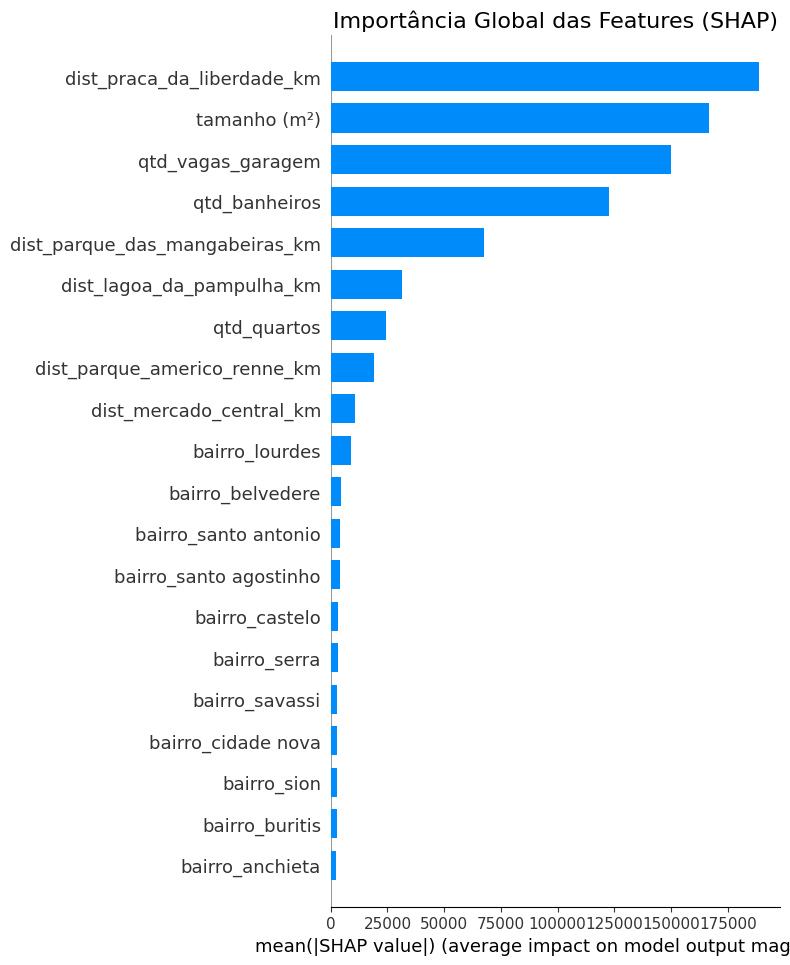

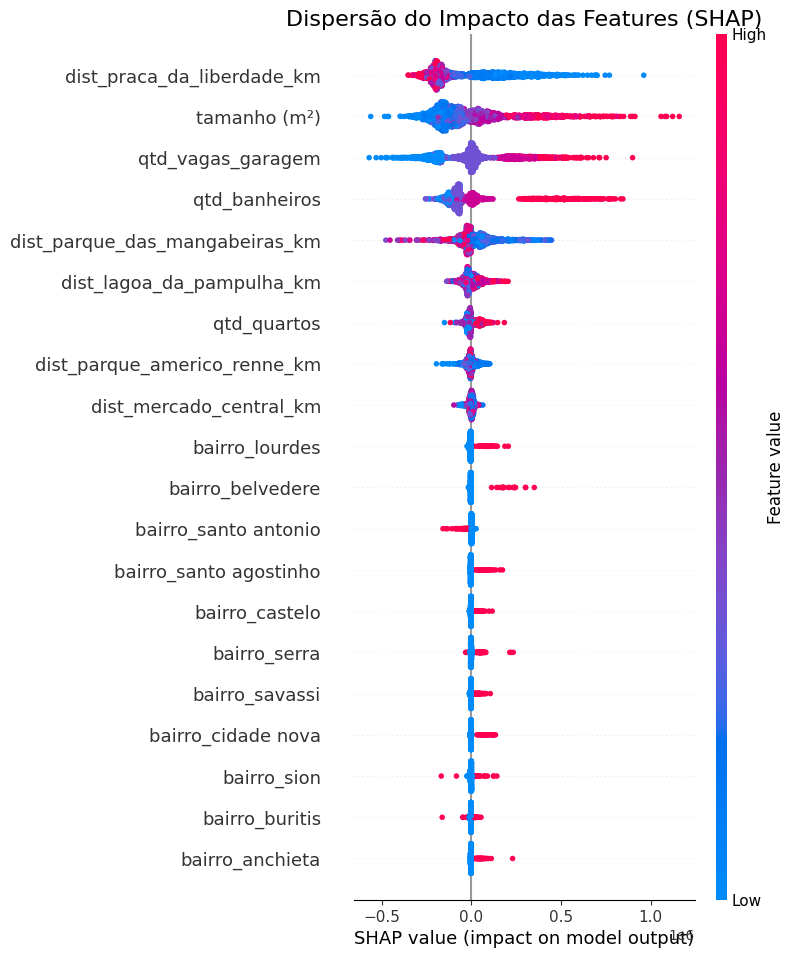

In [ ]:
# Ver a importância das features, impacto com a direção
shap.summary_plot(shap_values, x_test, plot_type="bar", show=False)
plt.title('Importância Global das Features (SHAP)', fontsize=16)
plt.show()

shap.summary_plot(shap_values, x_test, show=False)
plt.title('Dispersão do Impacto das Features (SHAP)', fontsize=16)
plt.show()